# Modelo de Regresión Logística
## Jacobo P. Marín
#### Universidad Nacional Abierta y a Distancia
#### Dataset: Heart Disease Cleveland UCI

### 1. Importación de Librerías y Datos

In [136]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Configuraciones adicionales
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# Cargar el dataset
df = pd.read_csv('heart_cleveland_upload.csv')

# Verificar nombres de columnas y limpiarlos si es necesario
df.columns = df.columns.str.strip()
print("\nNombres de las columnas:")
print(df.columns.tolist())

df.head(10)


Nombres de las columnas:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


### 2. Análisis Exploratorio


Resumen Estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std  

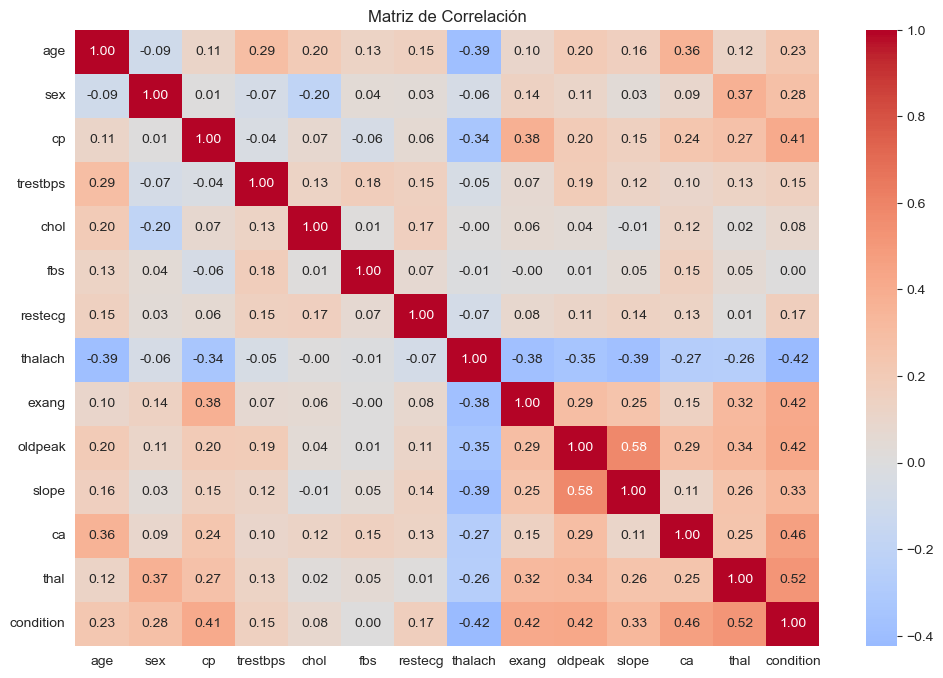

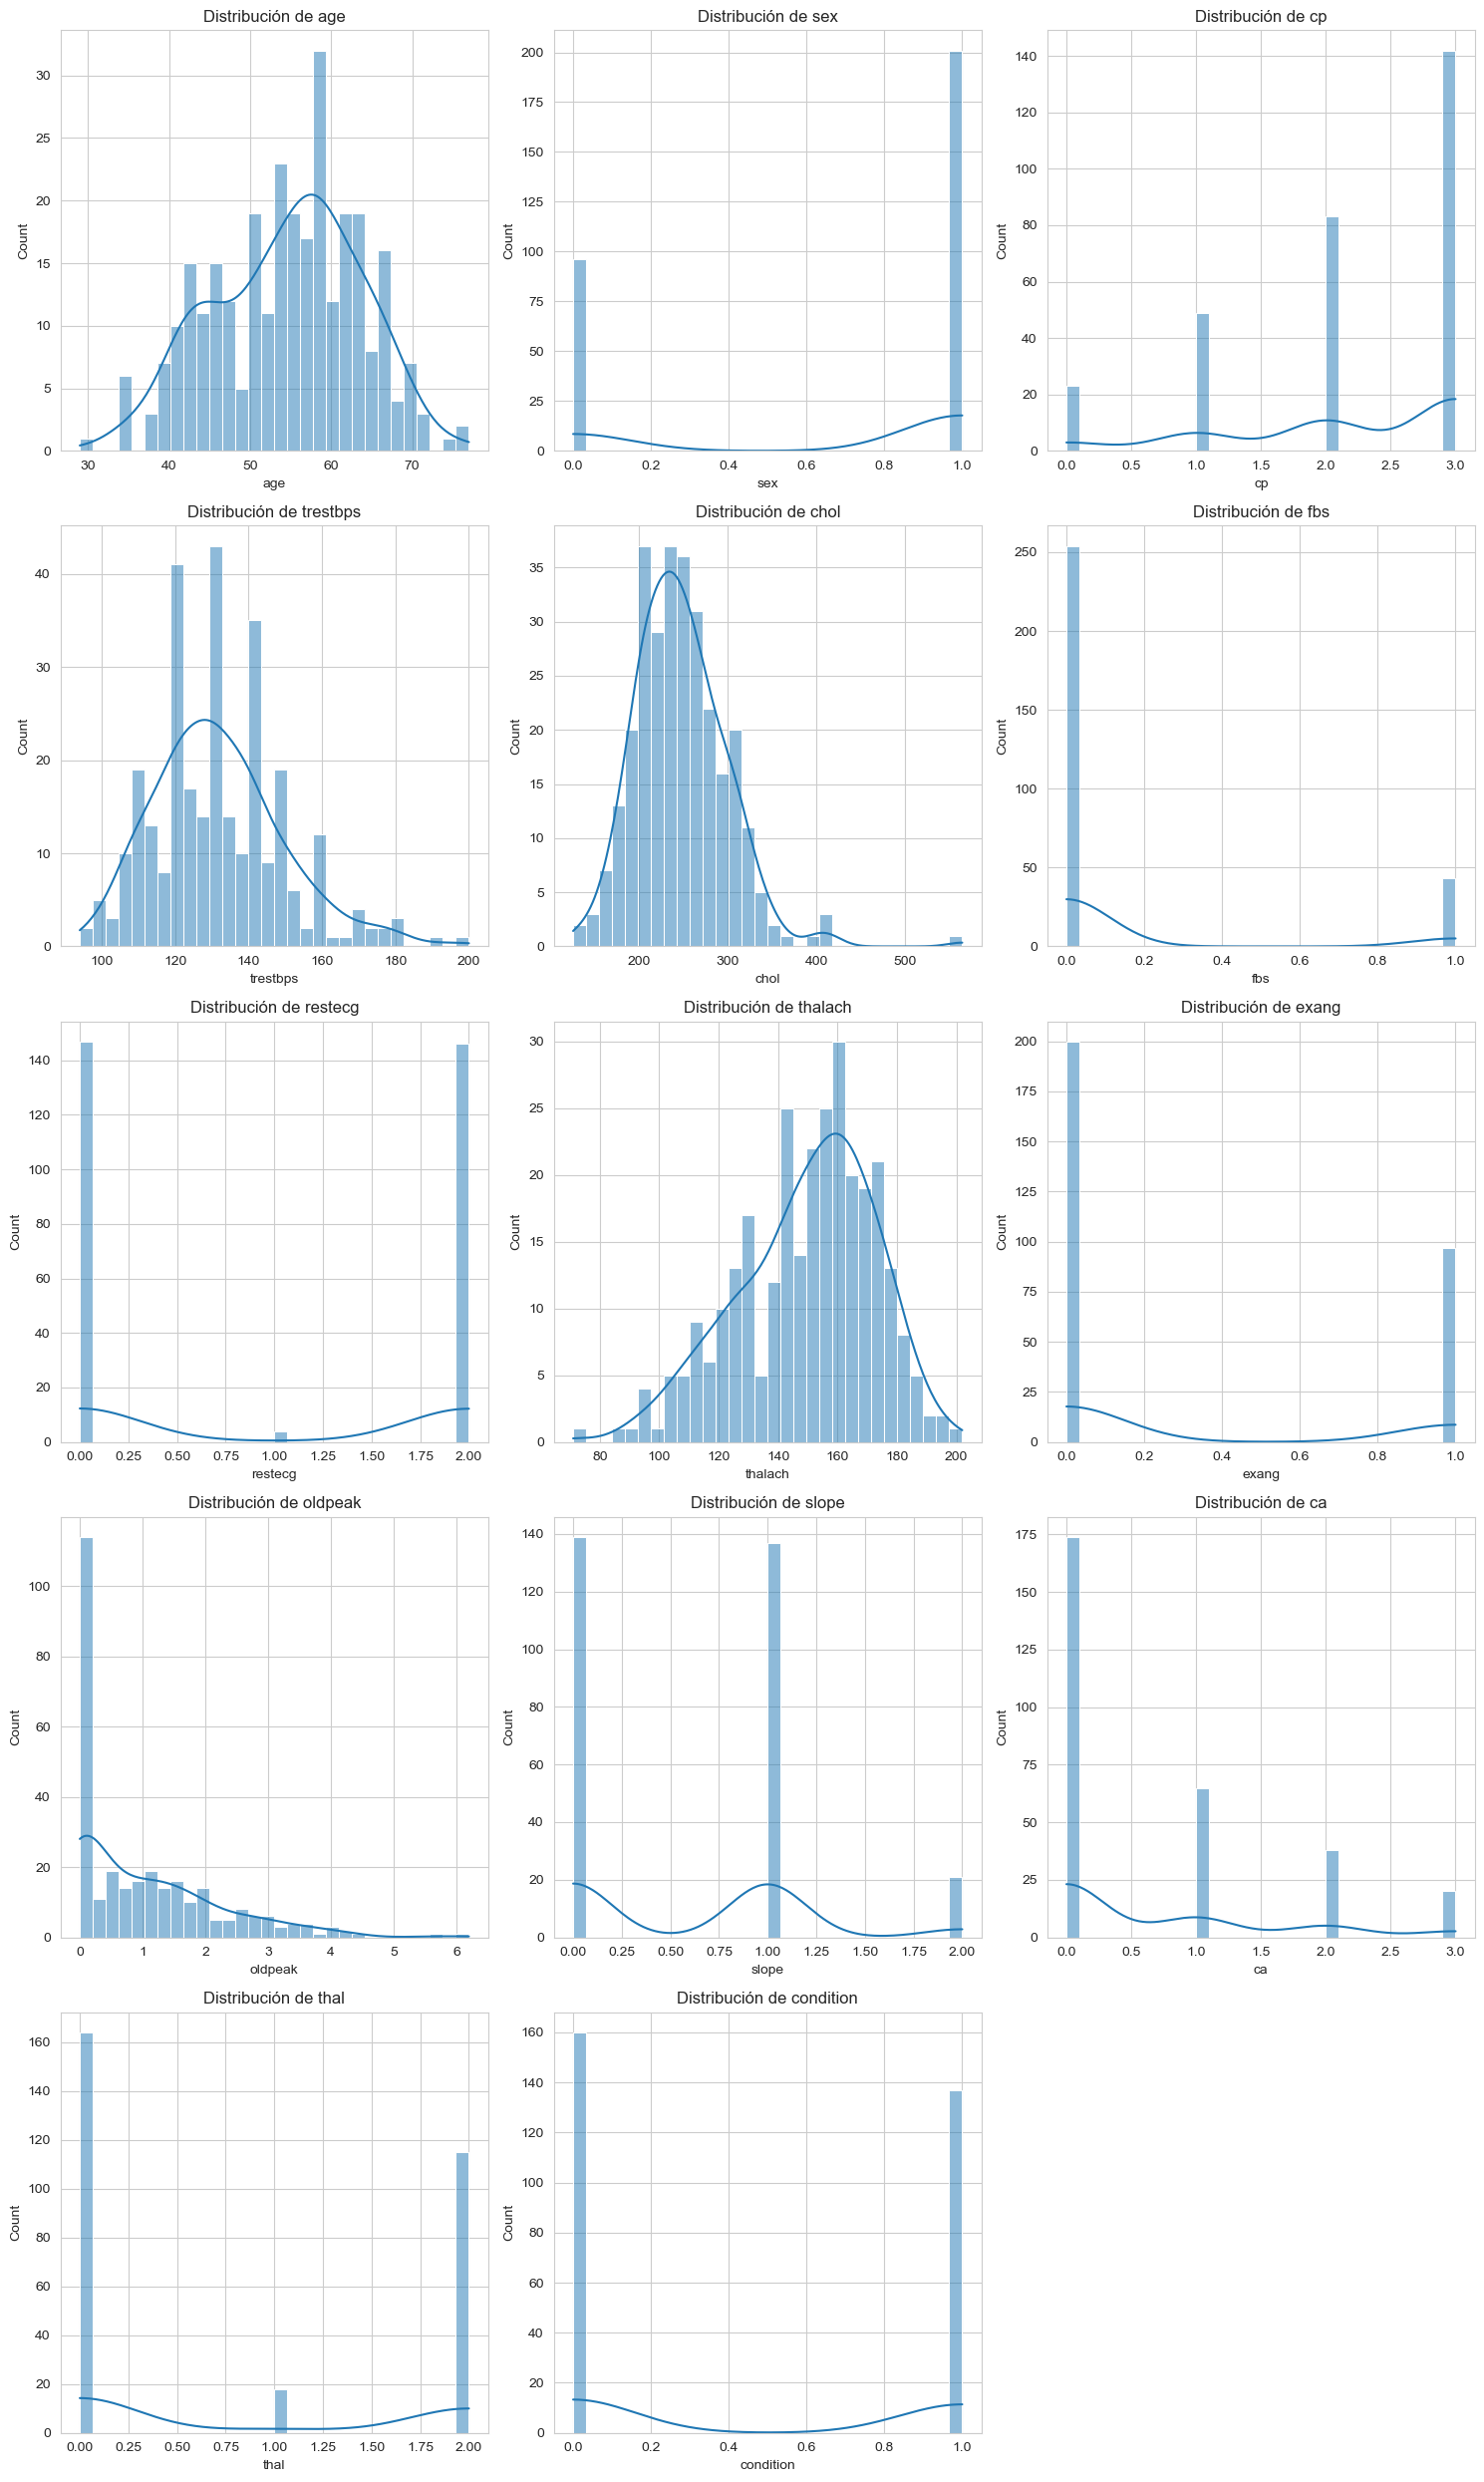

In [26]:
# Resumen estadístico
print("\nResumen Estadístico:")
print(df.describe())

# Información general del dataset
df.info()

# Verificar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Histograma de las variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

In [28]:
# lectura de datos
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


### 3. Preprocesamiento

In [14]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Limpiar valores nulos
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Llenar valores faltantes numéricos con la media
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print("\nValores nulos después del tratamiento:")
print(df_clean.isnull().sum())


Número de filas duplicadas: 0

Valores nulos después del tratamiento:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


Text(0.5, 1.0, 'Identificacion de datos atipicos')

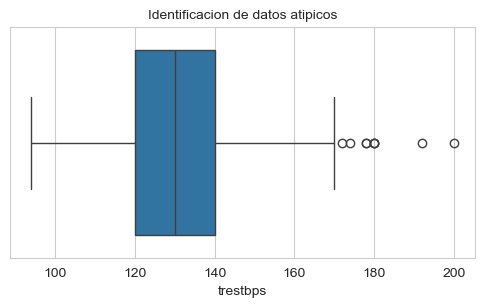

In [68]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['trestbps'])
plt.title('Identificacion de datos atipicos', fontsize=10)

In [66]:
#Conteo de Datos Atipicos

nivel_min=125
nivel_max=300

Total_Atipicos=((df['chol']<nivel_min)|(df['chol']>nivel_max)).sum()
print("El total de datos atipicos en la variable chol es {}".format(Total_Atipicos))


El total de datos atipicos en la variable chol es 44


In [72]:
#Filtro de datos atipicos

df=df[(df['chol']<nivel_max)&(df['chol']>nivel_min)]

Total_Atipicos=((df['chol']<nivel_min)|(df['chol']>nivel_max)).sum()
print("El total de datos atipicos en la variable chol es {}".format(Total_Atipicos))

El total de datos atipicos en la variable chol es 0


### 4. Selección de características

In [100]:
# Seleccionar características relevantes
X = df_clean[['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df_clean['condition']  # Variable objetivo

### 5. Division del Dataset en Train y Test

In [102]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (222, 6)
Tamaño del conjunto de prueba: (75, 6)


In [82]:
print (X_train)
print (X_test)

     age  sex  trestbps  chol  thalach  oldpeak
266   49    0       130   269      163      0.0
37    56    0       140   294      153      1.3
16    52    1       152   298      178      1.2
253   53    0       138   234      160      0.0
144   42    1       120   240      194      0.8
..   ...  ...       ...   ...      ...      ...
188   62    0       140   394      157      1.2
71    29    1       130   204      202      0.0
106   56    1       130   256      142      0.6
270   47    1       110   275      118      1.0
102   58    1       140   211      165      0.0

[207 rows x 6 columns]
     age  sex  trestbps  chol  thalach  oldpeak
167   66    0       178   228      165      1.0
211   59    1       140   177      162      0.0
63    41    1       135   203      132      0.0
154   37    0       120   215      170      0.0
5     64    1       170   227      155      0.6
..   ...  ...       ...   ...      ...      ...
15    52    1       118   186      190      0.0
10    59    1   

### 6. Entranamiento del modelo

In [87]:
#Construcción del modelo de regresión logistica
modelo_regresion = LogisticRegression(solver = "liblinear")

modelo_regresion.fit (X_train, y_train)

#Hacer predicciones
prediccion = modelo_regresion.predict(X_test)

In [91]:
print (y_test)

167    1
211    1
63     0
154    0
5      0
      ..
280    1
125    0
157    1
223    0
76     1
Name: condition, Length: 75, dtype: int64


In [105]:
print (prediccion)

[0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0
 1]


### 7. Evaluación

In [110]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        38
           1       0.62      0.68      0.65        37

    accuracy                           0.64        75
   macro avg       0.64      0.64      0.64        75
weighted avg       0.64      0.64      0.64        75



### 8. Visualización de resultados

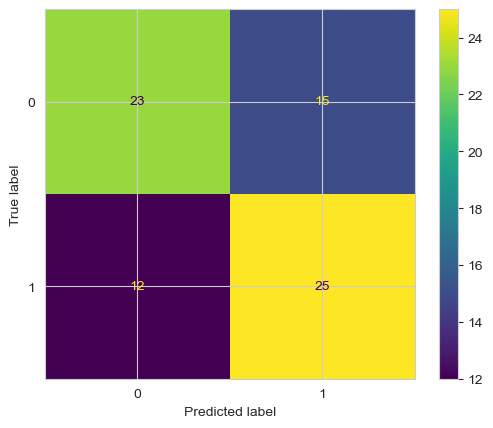

In [122]:
#Matrix de confuncion del modelo

cm = confusion_matrix(y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

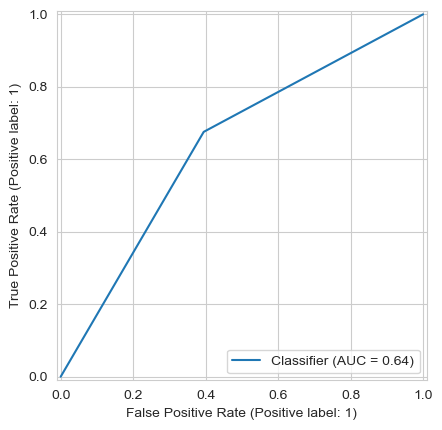

In [126]:
#Curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediccion)
plt.show()